## **Data Visualization**

---


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# PLEASE ADAPT PATH ACCORDINGLY
DATA_PATH  = '../../data/tickets_postprp.pkl'

df = pd.read_pickle(DATA_PATH)

In [ ]:
#df['faq_index_max_sim'] = df['faq_index_max_sim'].astype(int)
#df['faq_index_min_dif'] = df['faq_index_min_dif'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12115 entries, 0 to 12183
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   12115 non-null  int64         
 1   beschreibung         12115 non-null  object        
 2   kategorie_id         12115 non-null  object        
 3   kategorietext        12115 non-null  object        
 4   unterkategorie_id    12115 non-null  object        
 5   unterkategorietext   12115 non-null  object        
 6   status               12115 non-null  object        
 7   angelegt_am          12115 non-null  float64       
 8   angelegt_von         12115 non-null  object        
 9   auftraggeber         12115 non-null  object        
 10  meldender            12115 non-null  object        
 11  bearbeiter           6715 non-null   object        
 12  num_messages         12115 non-null  int64         
 13  editors              12115 non-

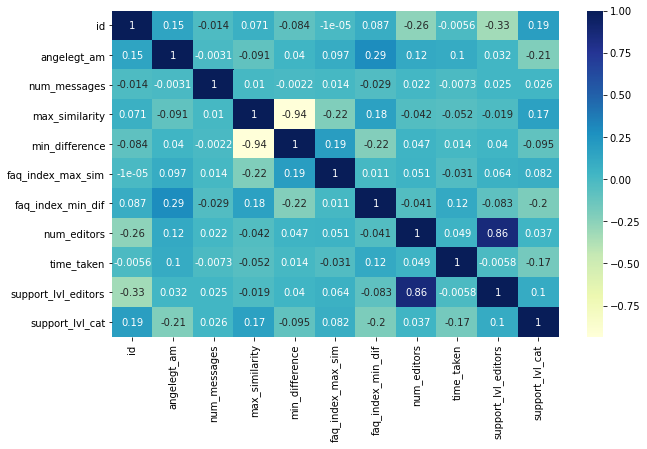

In [ ]:
# Pearson correlation matrix
import seaborn as sns
corr_matrix_p = df.corr(method = "pearson")
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_p, annot=True, cmap="YlGnBu")

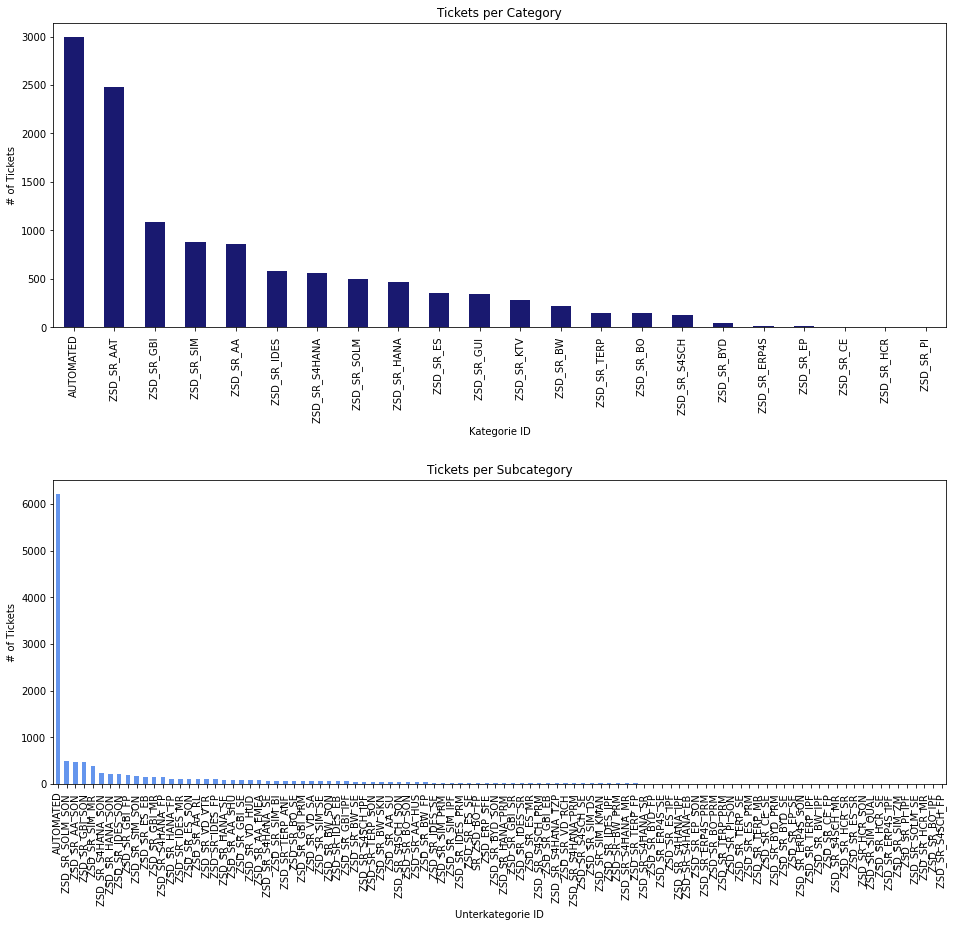

In [ ]:
# Bar charts based on grouped dataframe for each category
fig, axes = plt.subplots(2, 1, figsize=(16,14))
fig1 = df['kategorie_id'].value_counts().plot(kind='bar',
                                      ax = axes[0],
                                      color = "midnightblue",
                                      title="Tickets per Category")
fig2 = df['unterkategorie_id'].value_counts().plot(kind='bar',
                                      ax = axes[1],
                                      color = "cornflowerblue",
                                      title="Tickets per Subcategory")
fig1.set_xlabel("Kategorie ID")
fig1.set_ylabel("# of Tickets")
fig2.set_xlabel("Unterkategorie ID")
fig2.set_ylabel("# of Tickets")
plt.subplots_adjust(hspace=0.5)

In [ ]:
print("# of Different Values for Aufftraggeber")
df['auftraggeber'].value_counts()

# of Different Values for Aufftraggeber


0000000002    4963
EMPTY          855
H2851          469
H2451          271
H2741          213
              ... 
H2878            1
H2451TK1         1
U2GB057          1
H2201BG1         1
H2421            1
Name: auftraggeber, Length: 337, dtype: int64

In [ ]:
print("# of Different Values for Meldender")
df['meldender'].value_counts()

# of Different Values for Meldender


0000000002    4965
EMPTY          853
H2451TK1       204
H2851MR1       163
H2952BB1       159
              ... 
H2531CS1         1
U2PL003SB1       1
H2906KH1         1
H2893MH1         1
U2PL012PM1       1
Name: meldender, Length: 702, dtype: int64

**47.8% (5817 out of 12172) tickets have been raised automatically or do not contain any requester**. 

To get an overview of the teams and users that raise the most tickets, we will only look at the remaining 52.2% for the next visualizations.

In [ ]:
# remove auto-raised tickets
auto_raised = ['0000000002', 'EMPTY']
df_manual = df[~df.meldender.isin(auto_raised)]
df_auto = df[df.meldender.isin(auto_raised)]

In [ ]:
df_manual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6297 entries, 0 to 11358
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   6297 non-null   int64         
 1   beschreibung         6297 non-null   object        
 2   kategorie_id         6297 non-null   object        
 3   kategorietext        6297 non-null   object        
 4   unterkategorie_id    6297 non-null   object        
 5   unterkategorietext   6297 non-null   object        
 6   status               6297 non-null   object        
 7   angelegt_am          6297 non-null   float64       
 8   angelegt_von         6297 non-null   object        
 9   auftraggeber         6297 non-null   object        
 10  meldender            6297 non-null   object        
 11  bearbeiter           6167 non-null   object        
 12  num_messages         6297 non-null   int64         
 13  editors              6297 non-nu

In [ ]:
# Top 50 Aufftraggeber and Meldende
df_auftraggeber = df_manual.groupby(["auftraggeber"]).count().reset_index()
top50_auftraggeber = df_auftraggeber.sort_values("id", ascending = False).head(50)

df_meldender = df_manual.groupby(["meldender"]).count().reset_index()
top50_meldender = df_meldender.sort_values("id", ascending = False).head(50)

print("Share of Top 50 Auftraggeber")
share_auftraggeber = "{:.0%}".format((top50_auftraggeber["id"].sum())/(df_manual["id"].count()))
print(share_auftraggeber)

print("Share of Top 50 Meldender")
share_meldender = "{:.0%}".format((top50_meldender["id"].sum())/(df_manual["id"].count()))
print(share_meldender)

Share of Top 50 Auftraggeber
69%
Share of Top 50 Meldender
47%


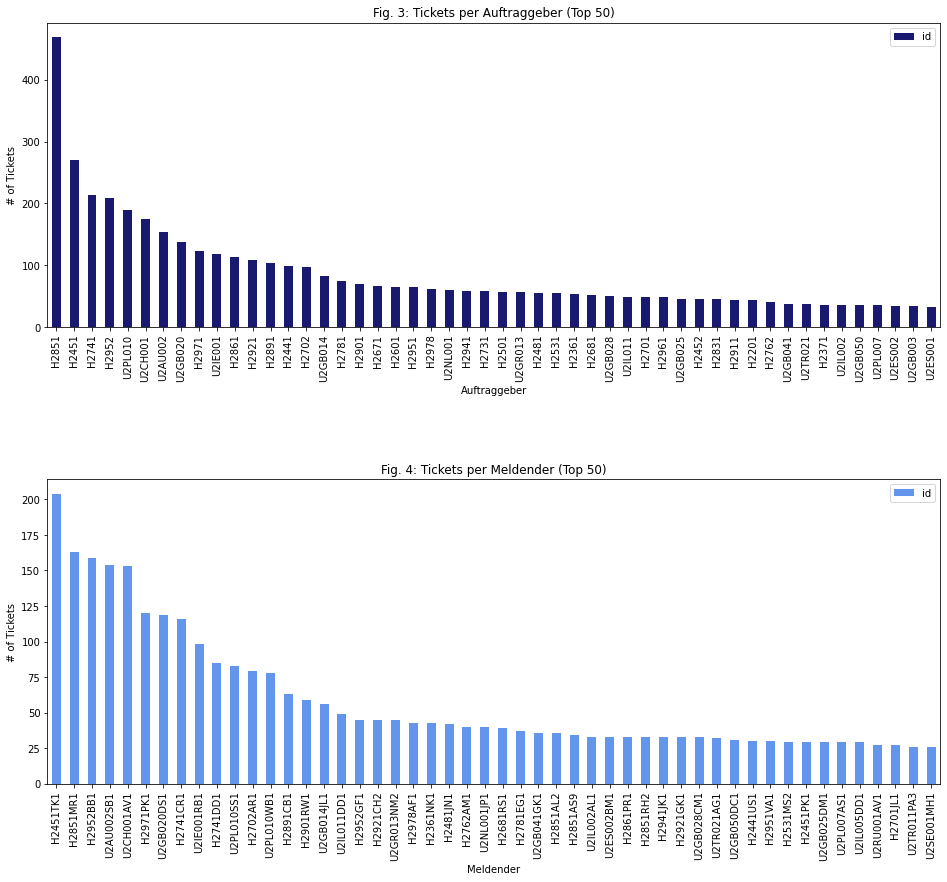

In [ ]:
# Bar charts for Top 50
fig, axes = plt.subplots(2, 1, figsize=(16,14))
fig3 = top50_auftraggeber.plot(kind='bar',
                                      x = "auftraggeber", 
                                      y = "id",
                                      ax = axes[0],
                                      color = "midnightblue",
                                      title="Fig. 3: Tickets per Auftraggeber (Top 50)")
fig4 = top50_meldender.plot(kind='bar',
                                      x = "meldender", 
                                      y = "id",
                                      ax = axes[1],
                                      color = "cornflowerblue",
                                      title="Fig. 4: Tickets per Meldender (Top 50)")
fig3.set_xlabel("Auftraggeber")
fig3.set_ylabel("# of Tickets")
fig4.set_xlabel("Meldender")
fig4.set_ylabel("# of Tickets")
plt.subplots_adjust(hspace=0.5)


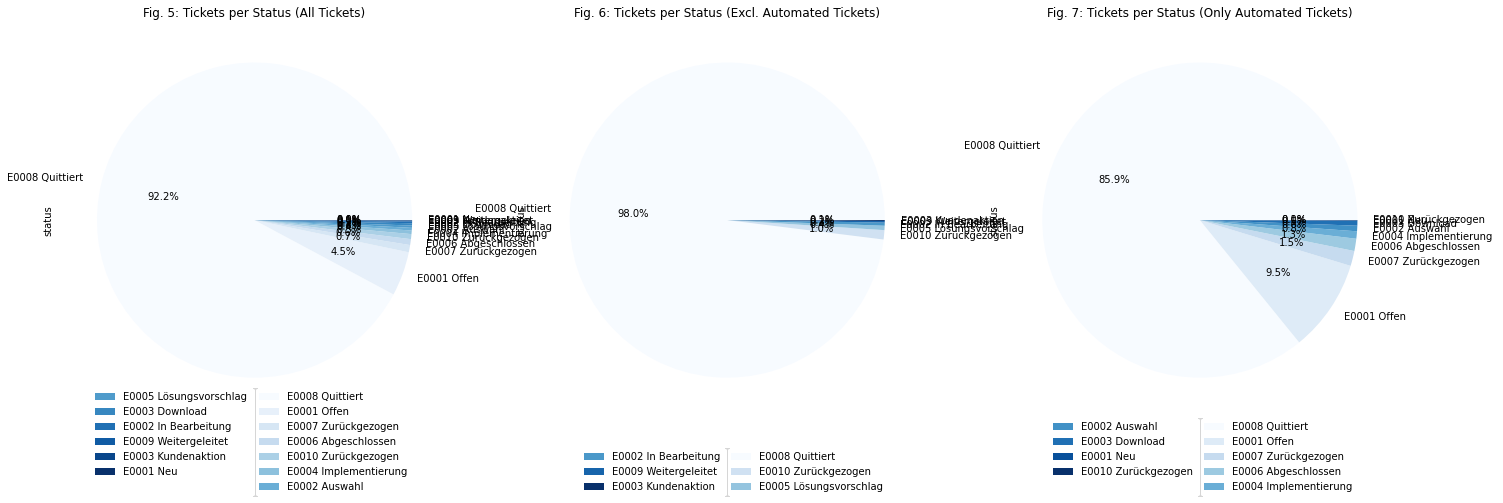

In [ ]:
# Pie charts
fig, axes = plt.subplots(1, 3, figsize=(24,12))

fig5 = df['status'].value_counts().plot.pie(ax = axes[0],
                                        autopct='%1.1f%%',
                                        cmap="Blues",
                                        title="Fig. 5: Tickets per Status (All Tickets)")
fig5.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
fig6 = df_manual['status'].value_counts().plot.pie(ax = axes[1],
                                        autopct='%1.1f%%',
                                        cmap="Blues",
                                        title="Fig. 6: Tickets per Status (Excl. Automated Tickets)")
fig7 = df_auto['status'].value_counts().plot.pie(ax = axes[2],
                                        autopct='%1.1f%%',
                                        cmap="Blues",
                                        title="Fig. 7: Tickets per Status (Only Automated Tickets)")

fig5.legend(bbox_to_anchor=(0.5, -0.2), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
fig6.legend(bbox_to_anchor=(0.5, -0.2), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
fig7.legend(bbox_to_anchor=(0.5, -0.2), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

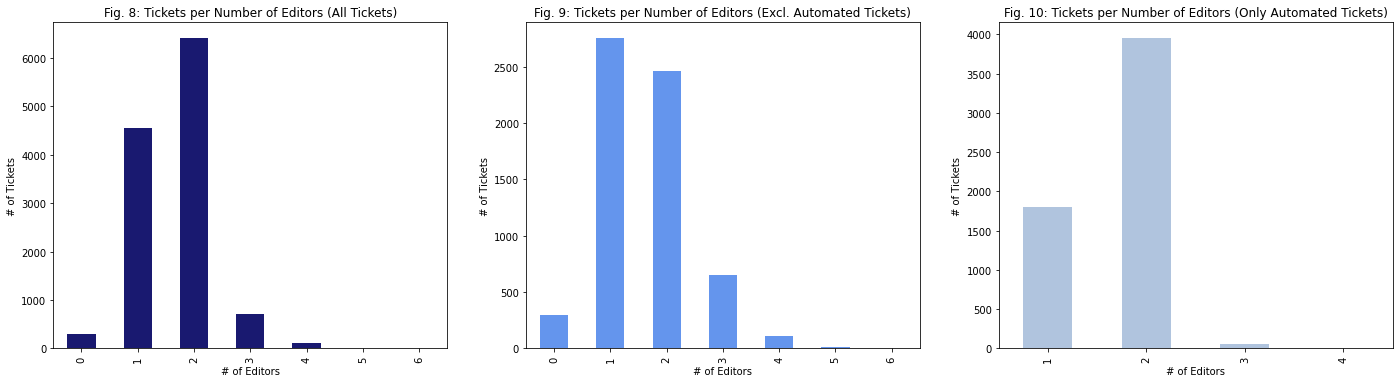

In [ ]:
# Bar charts based on grouped dataframe for each category
fig, axes = plt.subplots(1, 3, figsize=(24,6))

fig8 = df['num_editors'].value_counts().loc[[0,1,2,3,4,5,6]].plot(kind='bar',
                                      ax = axes[0],
                                      color = "midnightblue",
                                      title="Fig. 8: Tickets per Number of Editors (All Tickets)")
fig9 = df_manual['num_editors'].value_counts().loc[[0,1,2,3,4,5,6]].plot(kind='bar',
                                      ax = axes[1],
                                      color = "cornflowerblue",
                                      title="Fig. 9: Tickets per Number of Editors (Excl. Automated Tickets)")
fig10 = df_auto['num_editors'].value_counts().loc[[1,2,3,4]].plot(kind='bar',
                                      ax = axes[2],
                                      color = "lightsteelblue",
                                      title="Fig. 10: Tickets per Number of Editors (Only Automated Tickets)")

fig8.set_xlabel("# of Editors")
fig8.set_ylabel("# of Tickets")
fig9.set_xlabel("# of Editors")
fig9.set_ylabel("# of Tickets")
fig10.set_xlabel("# of Editors")
fig10.set_ylabel("# of Tickets")
plt.subplots_adjust(hspace=0.5)

In [ ]:
# define First Level Support as num_editors <= 1, Second Level Support otherwise
df['support_lvl'] = 0
df.loc[df['num_editors'] <= 1, ['support_lvl']] = 1
df.loc[df['num_editors'] > 1, ['support_lvl']] = 2

df_manual['support_lvl'] = 0
df_manual.loc[df['num_editors'] <= 1, ['support_lvl']] = 1
df_manual.loc[df['num_editors'] > 1, ['support_lvl']] = 2

df_auto['support_lvl'] = 0
df_auto.loc[df['num_editors'] <= 1, ['support_lvl']] = 1
df_auto.loc[df['num_editors'] > 1, ['support_lvl']] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

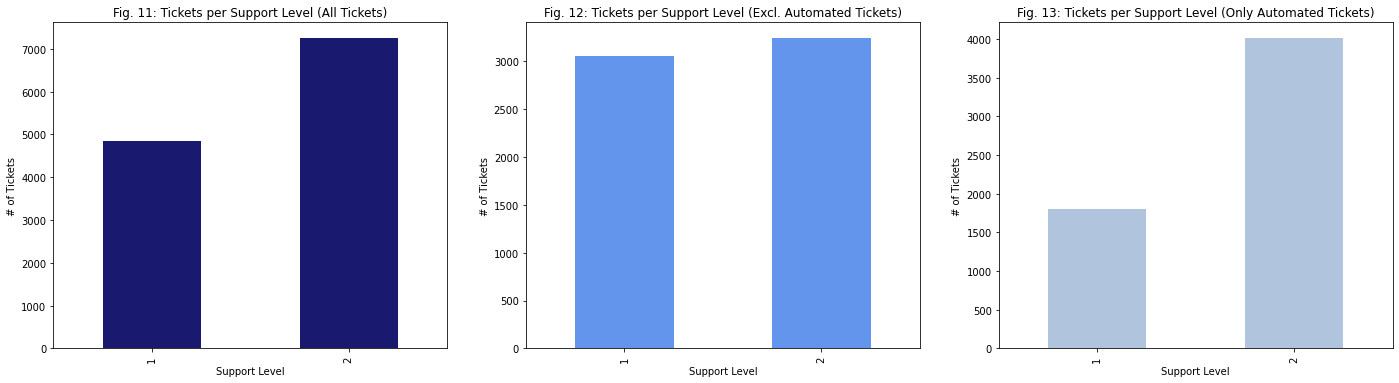

In [ ]:
# Bar charts based on grouped dataframe for each category
fig, axes = plt.subplots(1, 3, figsize=(24,6))

fig11 = df['support_lvl'].value_counts().loc[[1,2]].plot(kind='bar',
                                      ax = axes[0],
                                      color = "midnightblue",
                                      title="Fig. 11: Tickets per Support Level (All Tickets)")
fig12 = df_manual['support_lvl'].value_counts().loc[[1,2]].plot(kind='bar',
                                      ax = axes[1],
                                      color = "cornflowerblue",
                                      title="Fig. 12: Tickets per Support Level (Excl. Automated Tickets)")
fig13 = df_auto['support_lvl'].value_counts().loc[[1,2]].plot(kind='bar',
                                      ax = axes[2],
                                      color = "lightsteelblue",
                                      title="Fig. 13: Tickets per Support Level (Only Automated Tickets)")

fig11.set_xlabel("Support Level")
fig11.set_ylabel("# of Tickets")
fig12.set_xlabel("Support Level")
fig12.set_ylabel("# of Tickets")
fig13.set_xlabel("Support Level")
fig13.set_ylabel("# of Tickets")
plt.subplots_adjust(hspace=0.5)

Text(0.5, 1.0, 'Fig. 15: Tickets per Time Taken Until Resolution (Excl. Alert Tickets)')

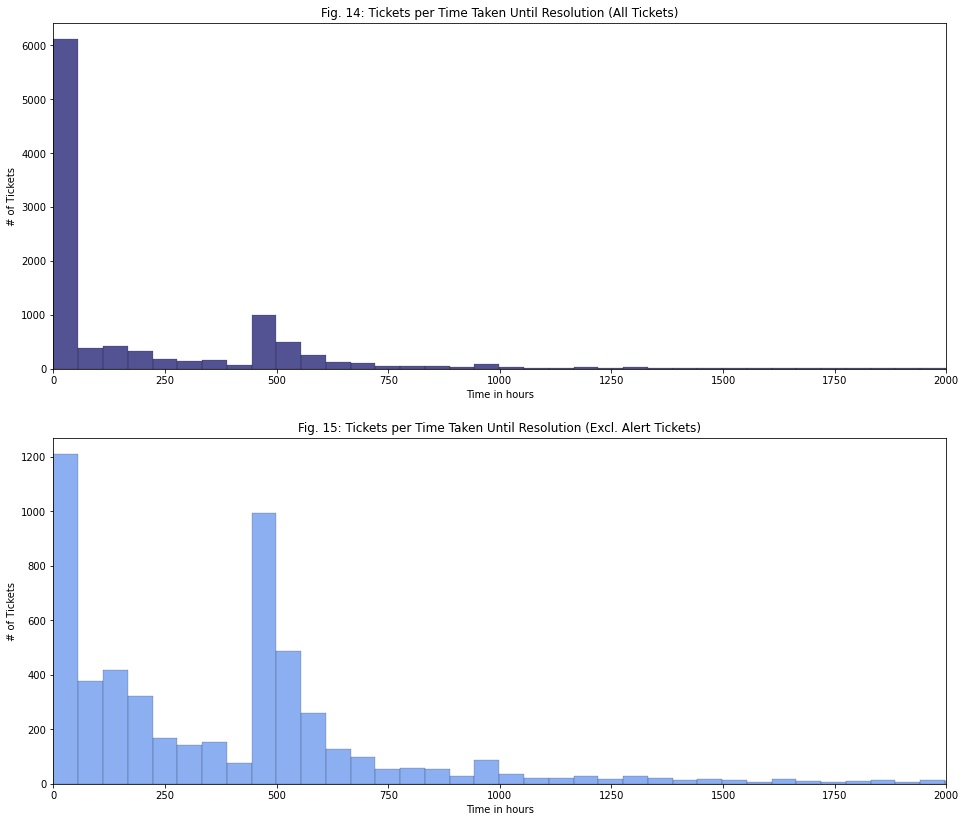

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16,14))

fig14 = sns.histplot(df['time_taken'], bins=500, ax = axes[0], kde=False, color = 'midnightblue')
fig14.set_xlim(0,2000)
fig14.set_xlabel('Time in hours')
fig14.set_ylabel('# of Tickets')
fig14.set_title('Fig. 14: Tickets per Time Taken Until Resolution (All Tickets)')

# Remove alert tickets
df_no_alerts = df[df['angelegt_von'] != 'SOLMAN_BTC ']

fig15 = sns.histplot(df_no_alerts['time_taken'], bins=500, ax = axes[1], kde=False, color = 'cornflowerblue')
fig15.set_xlim(0,2000)
fig15.set_xlabel('Time in hours')
fig15.set_ylabel('# of Tickets')
fig15.set_title('Fig. 15: Tickets per Time Taken Until Resolution (Excl. Alert Tickets)')


Text(0.5, 1.0, 'Fig. 17: Tickets per Time Taken Until Resolution (Only Second Level & Non-Alert Tickets)')

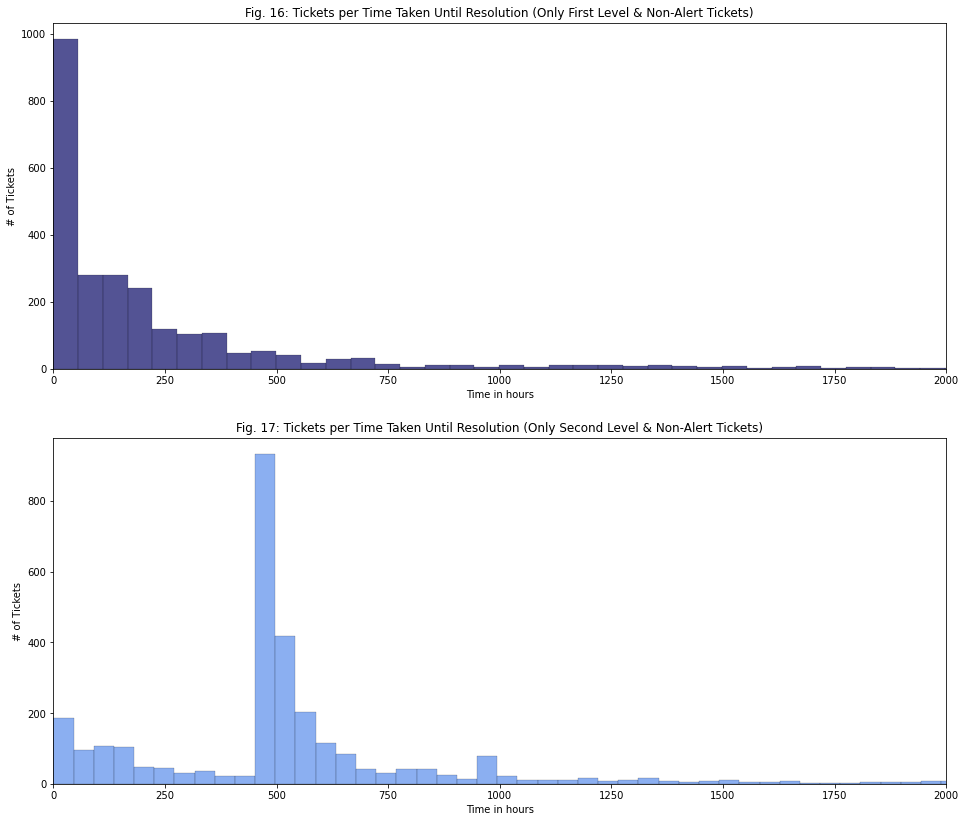

In [ ]:
df_fst_lvl = df_no_alerts[df_no_alerts['support_lvl'] == 1]
df_snd_lvl = df_no_alerts[df_no_alerts['support_lvl'] == 2]

fig, axes = plt.subplots(2, 1, figsize=(16,14))

fig16 = sns.histplot(df_fst_lvl['time_taken'], bins=500, ax = axes[0], kde=False, color = 'midnightblue')
fig16.set_xlim(0,2000)
fig16.set_xlabel('Time in hours')
fig16.set_ylabel('# of Tickets')
fig16.set_title('Fig. 16: Tickets per Time Taken Until Resolution (Only First Level & Non-Alert Tickets)')

fig17 = sns.histplot(df_snd_lvl['time_taken'], bins=500, ax = axes[1], kde=False, color = 'cornflowerblue')
fig17.set_xlim(0,2000)
fig17.set_xlabel('Time in hours')
fig17.set_ylabel('# of Tickets')
fig17.set_title('Fig. 17: Tickets per Time Taken Until Resolution (Only Second Level & Non-Alert Tickets)')

In [ ]:
print("Mean Time in hours until resolution excl. alert tickets): " + str(df_no_alerts["time_taken"].mean()))

Mean Time in hours until resolution excl. alert tickets): 566.3764684857395


**German Support Tickets**

In [ ]:
german_df = df_no_alerts[df_no_alerts['language'] == 'de']

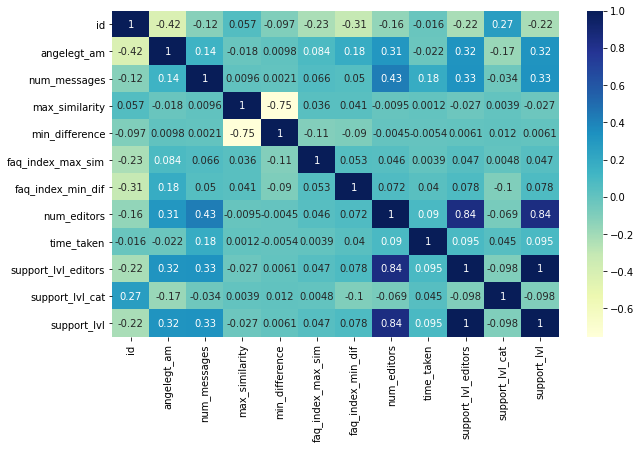

In [ ]:
# Pearson correlation matrix
import seaborn as sns
corr_matrix_p = german_df.corr(method = "pearson")
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_p, annot=True, cmap="YlGnBu")

In [ ]:
#test = german_df[german_df['faq_index_max_sim'] == 3]
test = german_df[german_df['num_editors'] >= 15]
test.head()

,id,beschreibung,kategorie_id,kategorietext,unterkategorie_id,unterkategorietext,status,angelegt_am,angelegt_von,auftraggeber,meldender,bearbeiter,num_messages,editors,initial_message,similarity,difference,embedding,max_similarity,min_difference,faq_index_max_sim,faq_index_min_dif,num_editors,time_start,time_finish,time_taken,language,support_lvl_editors,support_lvl_cat,support_lvl


Text(0, 0.5, '# of Tickets')

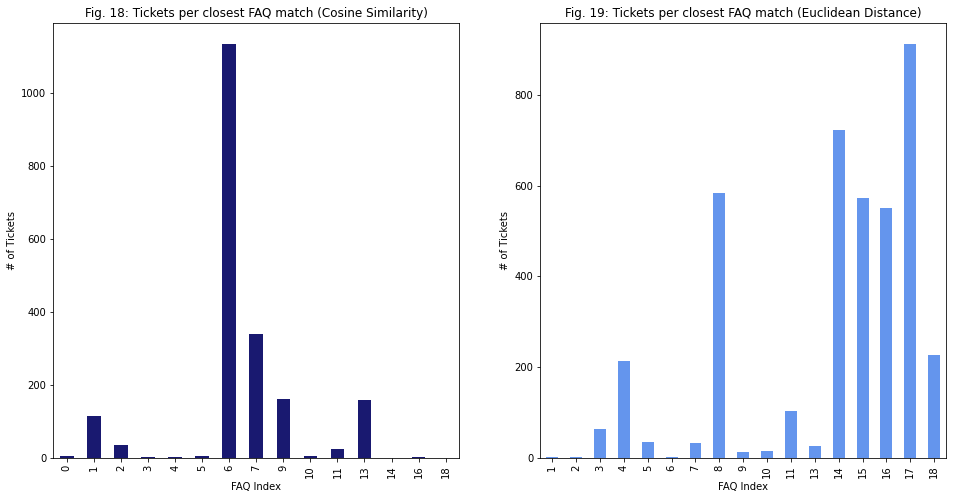

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

fig18 = german_df['faq_index_max_sim'].value_counts().loc[[0,1,2,3,4,5,6,7,9,10,11,13,14,16,18]].plot(kind='bar',
                                      ax = axes[0],
                                      color = "midnightblue",
                                      title="Fig. 18: Tickets per closest FAQ match (Cosine Similarity)")

fig19 = german_df['faq_index_min_dif'].value_counts().loc[[1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18]].plot(kind='bar',
                                      ax = axes[1],
                                      color = "cornflowerblue",
                                      title="Fig. 19: Tickets per closest FAQ match (Euclidean Distance)")
fig18.set_xlabel("FAQ Index")
fig18.set_ylabel("# of Tickets")
fig19.set_xlabel("FAQ Index")
fig19.set_ylabel("# of Tickets")

Text(0, 0.5, 'Mean Euclidean Distance')

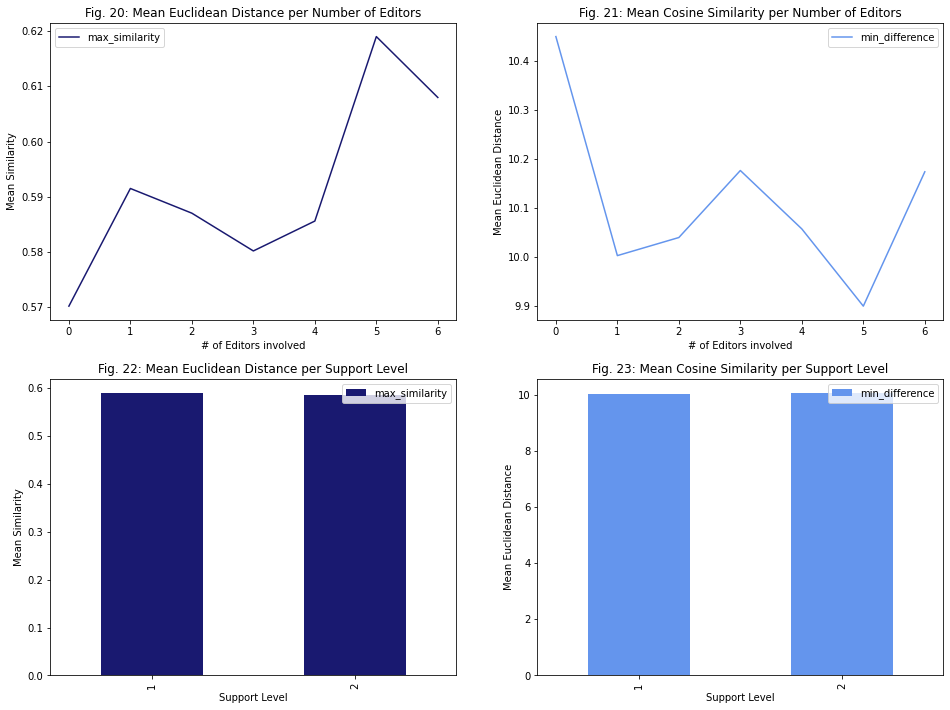

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig = german_df.groupby(['num_editors']).mean().reset_index()
fig20 = fig.plot(x = 'num_editors', y = 'max_similarity', kind='line',
                                      ax = axes[0,0],
                                      color = "midnightblue",
                                      title="Fig. 20: Mean Euclidean Distance per Number of Editors")
fig21 = fig.plot(x = 'num_editors', y = 'min_difference', kind='line',
                                      ax = axes[0,1],
                                      color = "cornflowerblue",
                                      title="Fig. 21: Mean Cosine Similarity per Number of Editors")                                    
fig20.set_xlabel("# of Editors involved")
fig20.set_ylabel("Mean Similarity")
fig21.set_xlabel("# of Editors involved")
fig21.set_ylabel("Mean Euclidean Distance")

fig = german_df.groupby(['support_lvl']).mean().reset_index()
fig22 = fig.plot(x = 'support_lvl', y = 'max_similarity', kind='bar',
                                      ax = axes[1,0],
                                      color = "midnightblue",
                                      title="Fig. 22: Mean Euclidean Distance per Support Level")
fig23 = fig.plot(x = 'support_lvl', y = 'min_difference', kind='bar',
                                      ax = axes[1,1],
                                      color = "cornflowerblue",
                                      title="Fig. 23: Mean Cosine Similarity per Support Level")                                    
fig22.set_xlabel("Support Level")
fig22.set_ylabel("Mean Similarity")
fig23.set_xlabel("Support Level")
fig23.set_ylabel("Mean Euclidean Distance")

**English Support Tickets**

In [ ]:
english_df = df_no_alerts[df_no_alerts['language'] == 'en']

In [ ]:
# Define First Level Support as num_editors <= 1, Second Level Support otherwise
english_df['support_lvl'] = 0
english_df.loc[english_df['num_editors'] <= 1, ['support_lvl']] = 1
english_df.loc[english_df['num_editors'] > 1, ['support_lvl']] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

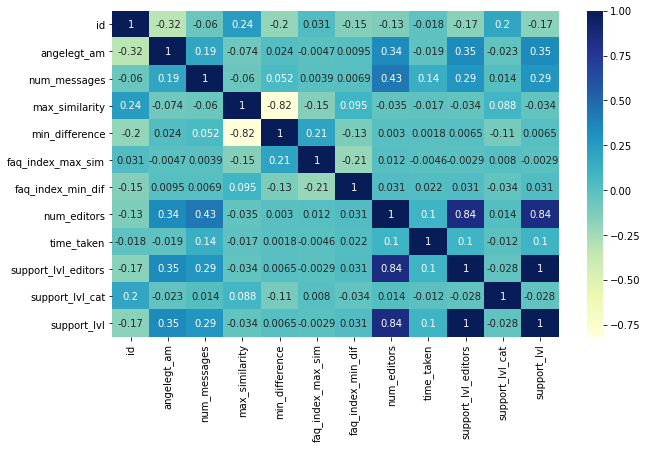

In [ ]:
# Pearson correlation matrix
import seaborn as sns
corr_matrix_p = english_df.corr(method = "pearson")
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_p, annot=True, cmap="YlGnBu")

Text(0, 0.5, '# of Tickets')

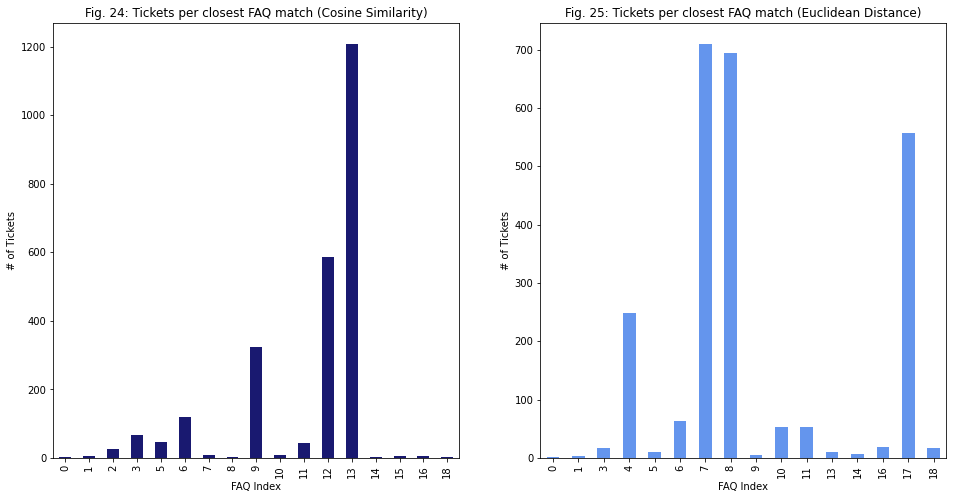

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

fig24 = english_df['faq_index_max_sim'].value_counts().loc[[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,18]].plot(kind='bar',
                                      ax = axes[0],
                                      color = "midnightblue",
                                      title="Fig. 24: Tickets per closest FAQ match (Cosine Similarity)")

fig25 = english_df['faq_index_min_dif'].value_counts().loc[[0,1,3,4,5,6,7,8,9,10,11,13,14,16,17,18]].plot(kind='bar',
                                      ax = axes[1],
                                      color = "cornflowerblue",
                                      title="Fig. 25: Tickets per closest FAQ match (Euclidean Distance)")
fig24.set_xlabel("FAQ Index")
fig24.set_ylabel("# of Tickets")
fig25.set_xlabel("FAQ Index")
fig25.set_ylabel("# of Tickets")

Text(0, 0.5, 'Mean Euclidean Distance')

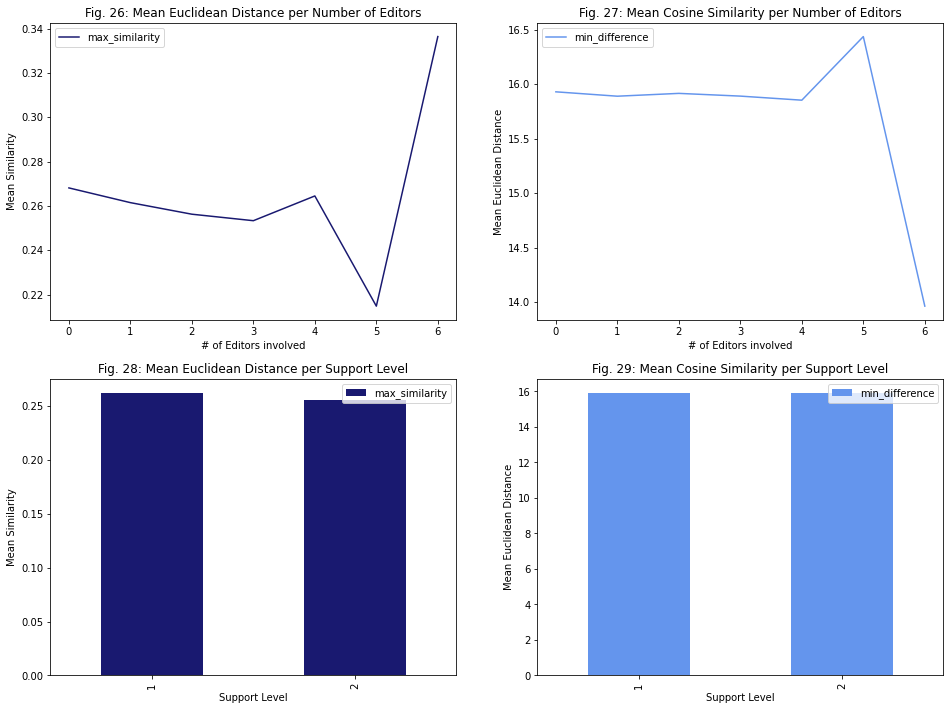

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig = english_df.groupby(['num_editors']).mean().reset_index()
fig26 = fig.plot(x = 'num_editors', y = 'max_similarity', kind='line',
                                      ax = axes[0,0],
                                      color = "midnightblue",
                                      title="Fig. 26: Mean Euclidean Distance per Number of Editors")
fig27 = fig.plot(x = 'num_editors', y = 'min_difference', kind='line',
                                      ax = axes[0,1],
                                      color = "cornflowerblue",
                                      title="Fig. 27: Mean Cosine Similarity per Number of Editors")                                    
fig26.set_xlabel("# of Editors involved")
fig26.set_ylabel("Mean Similarity")
fig27.set_xlabel("# of Editors involved")
fig27.set_ylabel("Mean Euclidean Distance")

fig = english_df.groupby(['support_lvl']).mean().reset_index()
fig28 = fig.plot(x = 'support_lvl', y = 'max_similarity', kind='bar',
                                      ax = axes[1,0],
                                      color = "midnightblue",
                                      title="Fig. 28: Mean Euclidean Distance per Support Level")
fig29 = fig.plot(x = 'support_lvl', y = 'min_difference', kind='bar',
                                      ax = axes[1,1],
                                      color = "cornflowerblue",
                                      title="Fig. 29: Mean Cosine Similarity per Support Level")                                    
fig28.set_xlabel("Support Level")
fig28.set_ylabel("Mean Similarity")
fig29.set_xlabel("Support Level")
fig29.set_ylabel("Mean Euclidean Distance")